# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2023/2024

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi i wytyczne ogólne dotyczące uzupełniania i oceny notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z fragmentów kodu opracowanego w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce notatnika.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu, odpowiedzi uzupełniane manualnie nie podlegają ocenie.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają na celu wyłapać podstawowe błędy. Przejście przez kod wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie i zostanie ocenione na maksymalną liczbę punktów.
- Zadania należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem). Rozmiar poziomy figur nie powinien przekraczać 20 cali.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (nazwa zespołu oraz imiona, nazwiska i numery indeksów członków zespołu) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$.

Nazwa zespołu: IAD25
Członkowie: Karolina Minor, Filip Przyczyna, Maciej Zabdyr, Maria Zalewska

---

## Zestaw zadań 3: Elementy statystyki opisowej 3 (Notatnik 3/3)

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

### Wczytanie danych
Poniższy kod wczytuje do zmiennych `daily_bike_traffic_data` oraz `weather_data` dane z przygotowanych wcześniej plików daily_bike_traffic_data.pkl i weather_data.pkl.

In [3]:
# Ruch rowerowy
daily_bike_traffic_data = pd.read_pickle("daily_bike_traffic_data.pkl")
daily_bike_traffic_data

,Total,East,West
Date,,,
2022-01-01,33.0,23.0,10.0
2022-01-02,37.0,20.0,17.0
2022-01-03,253.0,93.0,160.0
2022-01-04,577.0,220.0,357.0
2022-01-05,713.0,261.0,452.0
...,...,...,...
2022-12-27,429.0,181.0,248.0
2022-12-28,1108.0,449.0,659.0
2022-12-29,687.0,261.0,426.0


In [4]:
# Pogoda
weather_data = pd.read_pickle("weather_data.pkl")
weather_data

Temperature                      Precipitation Snow        \
                   Min       Avg        Max         Total Fall Depth   
Date                                                                   
2022-01-01   -5.555556 -2.222222   1.111111         0.000  0.0  76.2   
2022-01-02   -1.111111  2.777778   6.111111        20.066  0.0  76.2   
2022-01-03    0.555556  2.777778   5.000000        12.446  0.0   0.0   
2022-01-04    1.666667  3.888889   5.555556         5.588  0.0   0.0   
2022-01-05    1.111111  2.777778   3.888889         8.382  0.0   0.0   
...                ...       ...        ...           ...  ...   ...   
2022-12-27    6.666667  9.444444  11.666667         6.858  0.0   0.0   
2022-12-28    5.000000  6.666667   7.777778         0.762  0.0   0.0   
2022-12-29    5.000000  6.666667   7.777778         8.890  0.0   0.0   
2022-12-30    5.555556  8.888889  11.666667         9.144  0.0   0.0   
2022-12-31    6.111111  7.777778   9.444444         0.254  0.0   0.0   

                Wind                    Sky  
           Avg speed  Max speed Cloud cover  
Date                                         
2022-01-01  3.576311   5.364467         0.8  
2022-01-02  3.799831   8.940778         1.0  
2022-01-03  5.140947  11.623011         0.9  
2022-01-04  4.336277   9.834856         0.9  
2022-01-05  2.235194   4.470389         1.0  
...              ...        ...         ...  
2022-12-27  7.733773  16.540439         1.0  
2022-12-28  5.766802  12.517089         0.8  
2022-12-29  2.771641   7.599661         1.0  
2022-12-30  6.437360  11.623011         0.9  
2022-12-31  4.470389   9.387817         0.9  

[365 rows x 9 columns]

### Zadnie 4: Analiza korelacji [10 pkt]

#### a) Korelacje liniowe pomiędzy parametrami pogody a liczbą rowerzystów

Przygotuj tablicę zawierającą wartości współczynników korelacji liniowej Pearsona `R_corr_1` oraz tablicę wyliczonych na ich podstawie współczynników determinacji liniowej `R2_corr_1` pomiędzy wartościami parametrów pogody, a liczbą rowerzystów przejeżdżających przez most danego dnia.

Tablice powinna zawierać wyłącznie następujące elementy:</br>
> Indeks: zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data` </br>

> Kolumny: zestaw indeksów identycznych z nazwami kolumn tablicy `daily_bike_traffic_data`</br>
    
Wyświetl przygotowane tablice w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw dane zawarte w tablicach w postaci wykresów heatmap. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różną od domyślnej skalę kolorów wykresów,
- do każdego z wykresów dołącz pasek kolorów,
- skale kolorów oraz paski kolorów powinny mieć zakresy wartości docięte do teoretycznego zakresu wartości jakie może osiągać wizualizowany na wykresie parametr,
- ustaw parametry wykresu tak, aby wartości współczynników wyświetlały się z dokładnością 3 miejsc po przecinku.

In [5]:
# Tabela R


display(weather_data)
R_corr_1 = pd.DataFrame(index=weather_data.columns, columns=daily_bike_traffic_data.columns)

for column in R_corr_1.columns:
    for index in R_corr_1.index:
        correlation = weather_data[index].corr(daily_bike_traffic_data[column])
        R_corr_1.loc[index, column] = correlation
        
pd.set_option('display.precision', 3)
display(R_corr_1)


Temperature                      Precipitation Snow        \
                   Min       Avg        Max         Total Fall Depth   
Date                                                                   
2022-01-01   -5.555556 -2.222222   1.111111         0.000  0.0  76.2   
2022-01-02   -1.111111  2.777778   6.111111        20.066  0.0  76.2   
2022-01-03    0.555556  2.777778   5.000000        12.446  0.0   0.0   
2022-01-04    1.666667  3.888889   5.555556         5.588  0.0   0.0   
2022-01-05    1.111111  2.777778   3.888889         8.382  0.0   0.0   
...                ...       ...        ...           ...  ...   ...   
2022-12-27    6.666667  9.444444  11.666667         6.858  0.0   0.0   
2022-12-28    5.000000  6.666667   7.777778         0.762  0.0   0.0   
2022-12-29    5.000000  6.666667   7.777778         8.890  0.0   0.0   
2022-12-30    5.555556  8.888889  11.666667         9.144  0.0   0.0   
2022-12-31    6.111111  7.777778   9.444444         0.254  0.0   0.0   

                Wind                    Sky  
           Avg speed  Max speed Cloud cover  
Date                                         
2022-01-01  3.576311   5.364467         0.8  
2022-01-02  3.799831   8.940778         1.0  
2022-01-03  5.140947  11.623011         0.9  
2022-01-04  4.336277   9.834856         0.9  
2022-01-05  2.235194   4.470389         1.0  
...              ...        ...         ...  
2022-12-27  7.733773  16.540439         1.0  
2022-12-28  5.766802  12.517089         0.8  
2022-12-29  2.771641   7.599661         1.0  
2022-12-30  6.437360  11.623011         0.9  
2022-12-31  4.470389   9.387817         0.9  

[365 rows x 9 columns]

Total   East   West
Temperature   Min          0.702  0.714  0.679
              Avg          0.771   0.79  0.742
              Max          0.789  0.812  0.758
Precipitation Total       -0.452 -0.465 -0.434
Snow          Fall        -0.148 -0.151 -0.142
              Depth       -0.237 -0.238 -0.231
Wind          Avg speed   -0.238 -0.245 -0.228
              Max speed   -0.346 -0.344 -0.339
Sky           Cloud cover  -0.57 -0.584 -0.549

In [6]:
# Tabela R^2

R2_corr_1 = R_corr_1
R2_corr_1 = R2_corr_1.astype(float).applymap(lambda x: x**2)

display(R2_corr_1)

/tmp/ipykernel_8943/2669356713.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  R2_corr_1 = R2_corr_1.astype(float).applymap(lambda x: x**2)


Total   East   West
Temperature   Min          0.492  0.510  0.461
              Avg          0.594  0.625  0.551
              Max          0.622  0.660  0.574
Precipitation Total        0.204  0.216  0.188
Snow          Fall         0.022  0.023  0.020
              Depth        0.056  0.057  0.053
Wind          Avg speed    0.056  0.060  0.052
              Max speed    0.120  0.119  0.115
Sky           Cloud cover  0.325  0.341  0.301

In [7]:
### Komórka testowa

# Testy wybranych wartości z tablicy R
assert np.isclose(R_corr_1.loc[("Temperature", "Min"), "Total"], 0.7016549936827619)
assert np.isclose(R_corr_1.loc[('Snow', 'Fall'), "East"], -0.1513545851889312)
assert np.isclose(R_corr_1.loc[('Wind', 'Max speed'), "West"], -0.3394814202230162)

# Testy wybranych wartości z tablicy R^2
assert np.isclose(R2_corr_1.loc[("Temperature", "Avg"), "Total"], 0.5941735252448272)
assert np.isclose(R2_corr_1.loc[("Precipitation", "Total"), "East"], 0.21602605629121266)
assert np.isclose(R2_corr_1.loc[("Sky", "Cloud cover"), "West"], 0.3012666920823503)

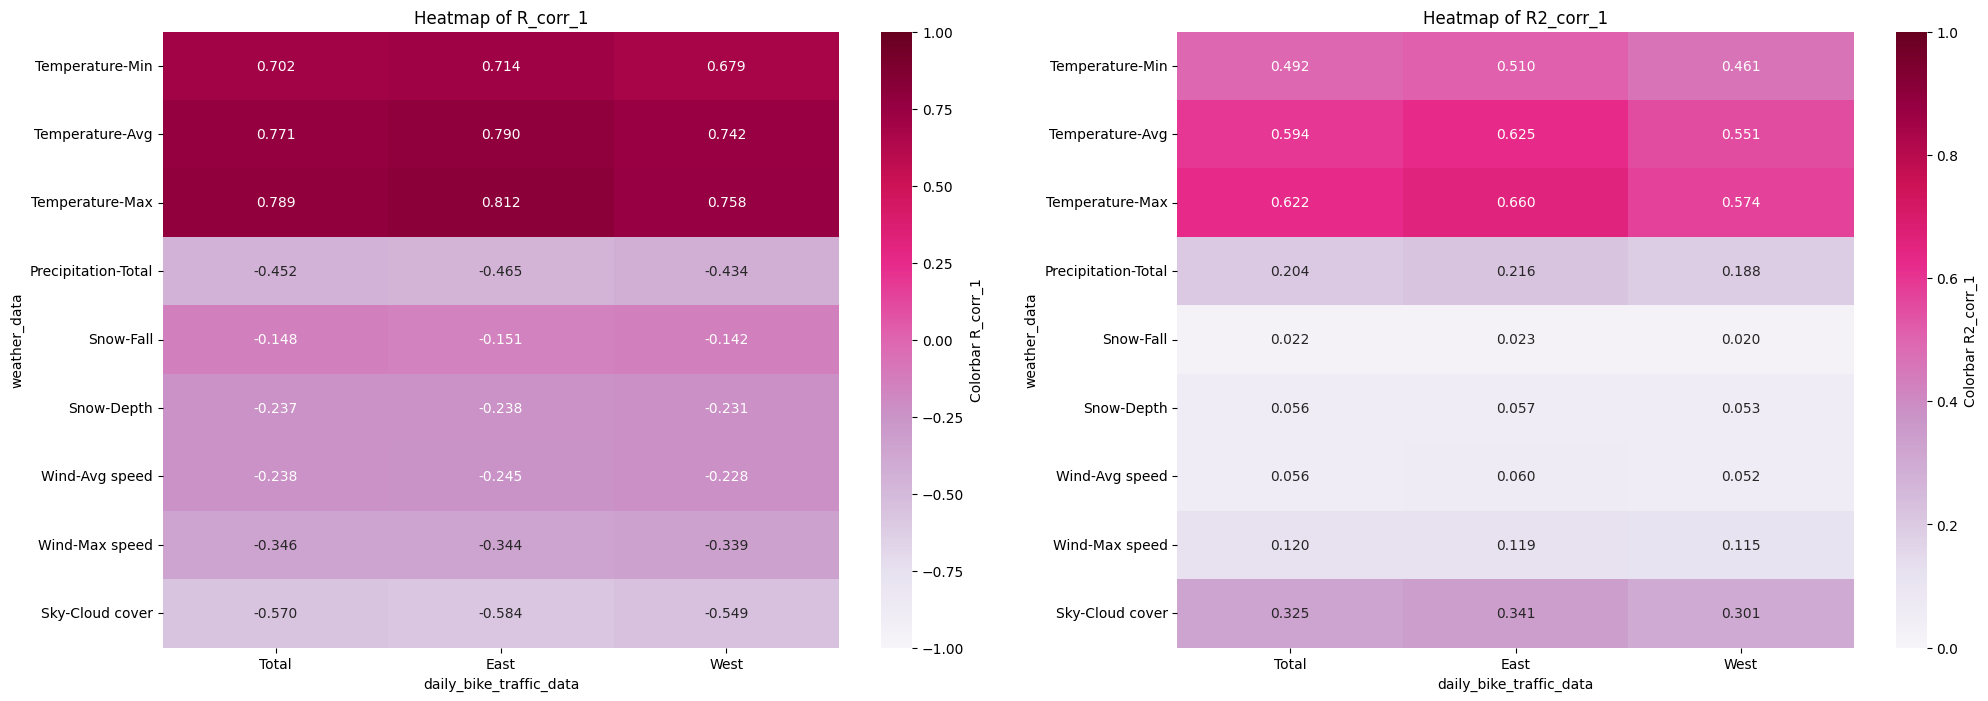

In [8]:
# Wykresy

fig, axes = plt.subplots(1, 2, figsize=(24, 8))

heatmap_1 = sns.heatmap(R_corr_1.astype(float), cmap="PuRd", vmin=-1, vmax=1, annot=True, fmt=".3f", cbar=True, ax=axes[0])
axes[0].set_title('Heatmap of R_corr_1')
axes[0].set_xlabel('daily_bike_traffic_data')
axes[0].set_ylabel('weather_data')


heatmap_2 = sns.heatmap(R2_corr_1.astype(float), cmap="PuRd", vmin=0, vmax=1, annot=True, fmt=".3f", cbar=True, ax=axes[1])
axes[1].set_title('Heatmap of R2_corr_1')
axes[1].set_xlabel('daily_bike_traffic_data')
axes[1].set_ylabel('weather_data')


colorbar_1 = heatmap_1.collections[0].colorbar
colorbar_1.set_label('Colorbar R_corr_1')

colorbar_2 = heatmap_2.collections[0].colorbar
colorbar_2.set_label('Colorbar R2_corr_1')

# Wyświetlenie wykresów

plt.show()

#### b) Korelacje liniowe między parametrami pogody

Przygotuj tablicę zawierającą wartości współczynników korelacji liniowej Pearsona `R_corr_2` oraz tablicę wyliczonych na ich podstawie współczynników determinacji liniowej `R2_corr_2` pomiędzy wartościami parametrów pogody.

- Tablice powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: Zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data`</br>
    
    > Kolumny: Zestaw indeksów identycznych z nazwami kolumn tablicy `weather_data`</br>
    
Wyświetl przygotowane tablice w taki sposób aby zawarte w nich wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw dane zawarte w tablicach w postaci wykresów heatmap. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różną od domyślnej skalę kolorów wykresów,
- do każdego z wykresów dołącz pasek kolorów,
- skale kolorów oraz paski kolorów powinny mieć zakresy wartości docięte do teoretycznego zakresu wartości jakie może osiągać wizualizowany na wykresie parametr,
- ustaw parametry wykresu tak, aby wartości współczynników wyświetlały się z dokładnością 3 miejsc po przecinku.

In [9]:
# Tablica R

R_corr_2 = pd.DataFrame(index=weather_data.columns, columns=weather_data.columns)

for column in R_corr_2.columns:
    for index in R_corr_2.index:
        correlation = weather_data[index].corr(weather_data[column])
        R_corr_2.loc[index, column] = correlation
        
pd.set_option('display.precision', 3)
display(R_corr_2)

Temperature               Precipitation   Snow  \
                                  Min    Avg    Max         Total   Fall   
Temperature   Min                 1.0  0.968  0.912        -0.155 -0.157   
              Avg               0.968    1.0  0.985        -0.215 -0.153   
              Max               0.912  0.985    1.0        -0.248 -0.145   
Precipitation Total            -0.155 -0.215 -0.248           1.0  0.114   
Snow          Fall             -0.157 -0.153 -0.145         0.114    1.0   
              Depth            -0.233 -0.216 -0.195         0.101  0.413   
Wind          Avg speed        -0.104 -0.129 -0.143         0.235  0.088   
              Max speed        -0.201 -0.216  -0.22         0.271   0.08   
Sky           Cloud cover      -0.355 -0.528 -0.625         0.354  0.018   

                                      Wind                   Sky  
                           Depth Avg speed Max speed Cloud cover  
Temperature   Min         -0.233    -0.104    -0.201      -0.355  
              Avg         -0.216    -0.129    -0.216      -0.528  
              Max         -0.195    -0.143     -0.22      -0.625  
Precipitation Total        0.101     0.235     0.271       0.354  
Snow          Fall         0.413     0.088      0.08       0.018  
              Depth          1.0     0.085     0.069       0.057  
Wind          Avg speed    0.085       1.0     0.872       0.111  
              Max speed    0.069     0.872       1.0       0.197  
Sky           Cloud cover  0.057     0.111     0.197         1.0

In [10]:
# Tablica R^2

R2_corr_2 = R_corr_2
R2_corr_2 = R2_corr_2.astype(float).applymap(lambda x: x**2)

pd.set_option('display.precision', 3)
display(R2_corr_2)

/tmp/ipykernel_8943/414467876.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  R2_corr_2 = R2_corr_2.astype(float).applymap(lambda x: x**2)


Temperature               Precipitation       Snow  \
                                  Min    Avg    Max         Total       Fall   
Temperature   Min               1.000  0.937  0.832         0.024  2.467e-02   
              Avg               0.937  1.000  0.971         0.046  2.351e-02   
              Max               0.832  0.971  1.000         0.062  2.094e-02   
Precipitation Total             0.024  0.046  0.062         1.000  1.290e-02   
Snow          Fall              0.025  0.024  0.021         0.013  1.000e+00   
              Depth             0.054  0.047  0.038         0.010  1.708e-01   
Wind          Avg speed         0.011  0.017  0.020         0.055  7.820e-03   
              Max speed         0.041  0.047  0.049         0.074  6.343e-03   
Sky           Cloud cover       0.126  0.279  0.390         0.125  3.312e-04   

                                      Wind                   Sky  
                           Depth Avg speed Max speed Cloud cover  
Temperature   Min          0.054     0.011     0.041   1.260e-01  
              Avg          0.047     0.017     0.047   2.786e-01  
              Max          0.038     0.020     0.049   3.904e-01  
Precipitation Total        0.010     0.055     0.074   1.253e-01  
Snow          Fall         0.171     0.008     0.006   3.312e-04  
              Depth        1.000     0.007     0.005   3.267e-03  
Wind          Avg speed    0.007     1.000     0.760   1.237e-02  
              Max speed    0.005     0.760     1.000   3.883e-02  
Sky           Cloud cover  0.003     0.012     0.039   1.000e+00

In [11]:
### Komórka testowa

# Testy wybranych wartości z tablicy R
assert np.isclose(R_corr_2.loc[("Temperature", "Avg"), ('Snow', 'Fall')], -0.15332754676249075)
assert np.isclose(R_corr_2.loc[("Precipitation", "Total"), ("Wind", "Max speed")], 0.27117268223209673)
assert np.isclose(R_corr_2.loc[("Sky", "Cloud cover"), ("Temperature", "Max")], -0.6248338895216168)

# Testy wybranych wartości z tablicy R^2
assert np.isclose(R2_corr_2.loc[("Snow", "Depth"), ("Wind", "Max speed")], 0.004732081693920376)
assert np.isclose(R2_corr_2.loc[("Temperature", "Min"), ("Temperature", "Avg")], 0.9373738975008452)
assert np.isclose(R2_corr_2.loc[("Precipitation", "Total"), ("Sky", "Cloud cover")], 0.12532191894477251)

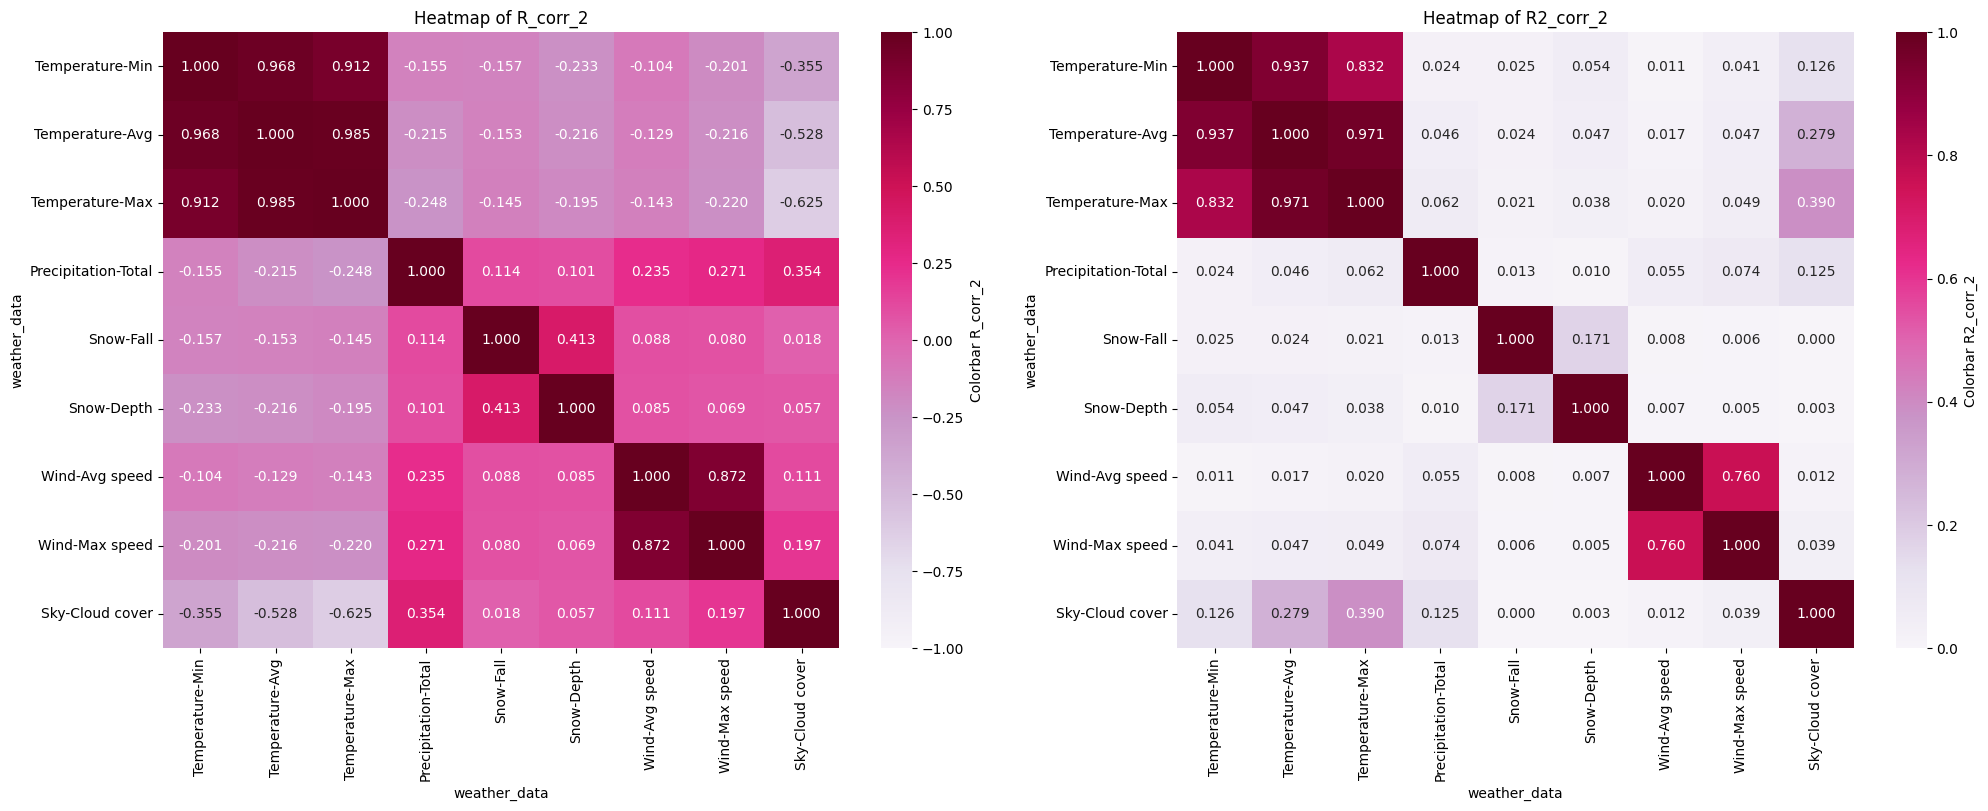

In [12]:
# Wykresy

fig, axes = plt.subplots(1, 2, figsize=(24, 8))

heatmap_1 = sns.heatmap(R_corr_2.astype(float), cmap="PuRd", vmin=-1, vmax=1, annot=True, fmt=".3f", cbar=True, ax=axes[0])
axes[0].set_title('Heatmap of R_corr_2')
axes[0].set_xlabel('weather_data')
axes[0].set_ylabel('weather_data')


heatmap_2 = sns.heatmap(R2_corr_2.astype(float), cmap="PuRd", vmin=0, vmax=1, annot=True, fmt=".3f", cbar=True, ax=axes[1])
axes[1].set_title('Heatmap of R2_corr_2')
axes[1].set_xlabel('weather_data')
axes[1].set_ylabel('weather_data')


colorbar_1 = heatmap_1.collections[0].colorbar
colorbar_1.set_label('Colorbar R_corr_2')

colorbar_2 = heatmap_2.collections[0].colorbar
colorbar_2.set_label('Colorbar R2_corr_2')

plt.show()

### Zadnie 5: Analiza regresji [25 pkt]

#### a) Regresja liniowa

Korzystając z funkcji `scipy.stats.linregress()` przygotuj tablicę `regression_data_1` zawierającą wartości współczynników równania regresji liniowej pomiędzy wartościami parametrów pogody (zmienna niezależna, objaśniająca), a liczbą rowerzystów przejeżdżających przez most danego dnia (zmienna zależna, objaśniana).

- Tablica powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: Zestaw indeksów identycznych z nazwami kolumn tablicy weather_data</br>
    
    > Kolumny:</br>
    > 1 rzędu: Total, East, West</br>
    > 2 rzędu: a, b (ten sam zestaw kolumn dla każdego indeksu 1 rzędu)</br>
    
Wyświetl przygotowaną tablicę w taki sposób aby zawarte w tablicy wartości wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw wyniki analizy w postaci wykresów korelacyjnych poszczególnych parametrów pogody z całkowitą liczbą rowerzystów przejeżdżających przes most danego dnia z nałożonymi na nie prostymi regresji. Zestaw wykresy na pojedynczej figurze (siatka wykresów 3x3). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory widocznych na wykresach punktów i linii,
- w tytule lub legendzie każdego z wykresów załącz równania regresji sformatowane tak, aby parametry równania były wyświetlone z dokładnością 3 miejsc po przecinku,
- w przypadku zastosowania legend należy je umiejscowić tak, aby znajdowały się w obrębie pól wykresów, ale nie zasłaniały znajdujących się na nich danych.

In [13]:
# Tabela
weather_data = pd.read_pickle("weather_data.pkl")

regression_data_1 = pd.DataFrame(index=weather_data.columns, columns=pd.MultiIndex.from_product([['Total', 'East', 'West'], ['a', 'b']]))

for weather_param in weather_data.columns:
    for traffic_col_name in daily_bike_traffic_data.columns:
        x = weather_data[weather_param]
        y = daily_bike_traffic_data[traffic_col_name]
        mask = ~np.isnan(x) & ~np.isnan(y)
        x = x[mask]
        y = y[mask]

        slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x, y)

        regression_data_1.loc[weather_param, (traffic_col_name, 'a')] = slope
        regression_data_1.loc[weather_param, (traffic_col_name, 'b')] = intercept

display(regression_data_1.style.format(precision=3))

In [14]:
### Komórka testowa

# Testy wybranych wartości z tablicy regression_data_1
assert np.isclose(regression_data_1.loc[("Temperature", "Avg"), ('Total', 'a')], 118.37455627981312)
assert np.isclose(regression_data_1.loc[("Snow", "Depth"), ('Total', 'b')], 2219.810729613734)
assert np.isclose(regression_data_1.loc[("Wind", "Avg speed"), ('East', 'a')], -74.72308463717329)
assert np.isclose(regression_data_1.loc[("Precipitation", "Total"), ('East', 'b')], 956.7960528263079)
assert np.isclose(regression_data_1.loc[("Temperature", "Min"), ('West', 'a')], 77.54619929276554)
assert np.isclose(regression_data_1.loc[("Wind", "Max speed"), ('West', 'b')], 1970.6955983993344)

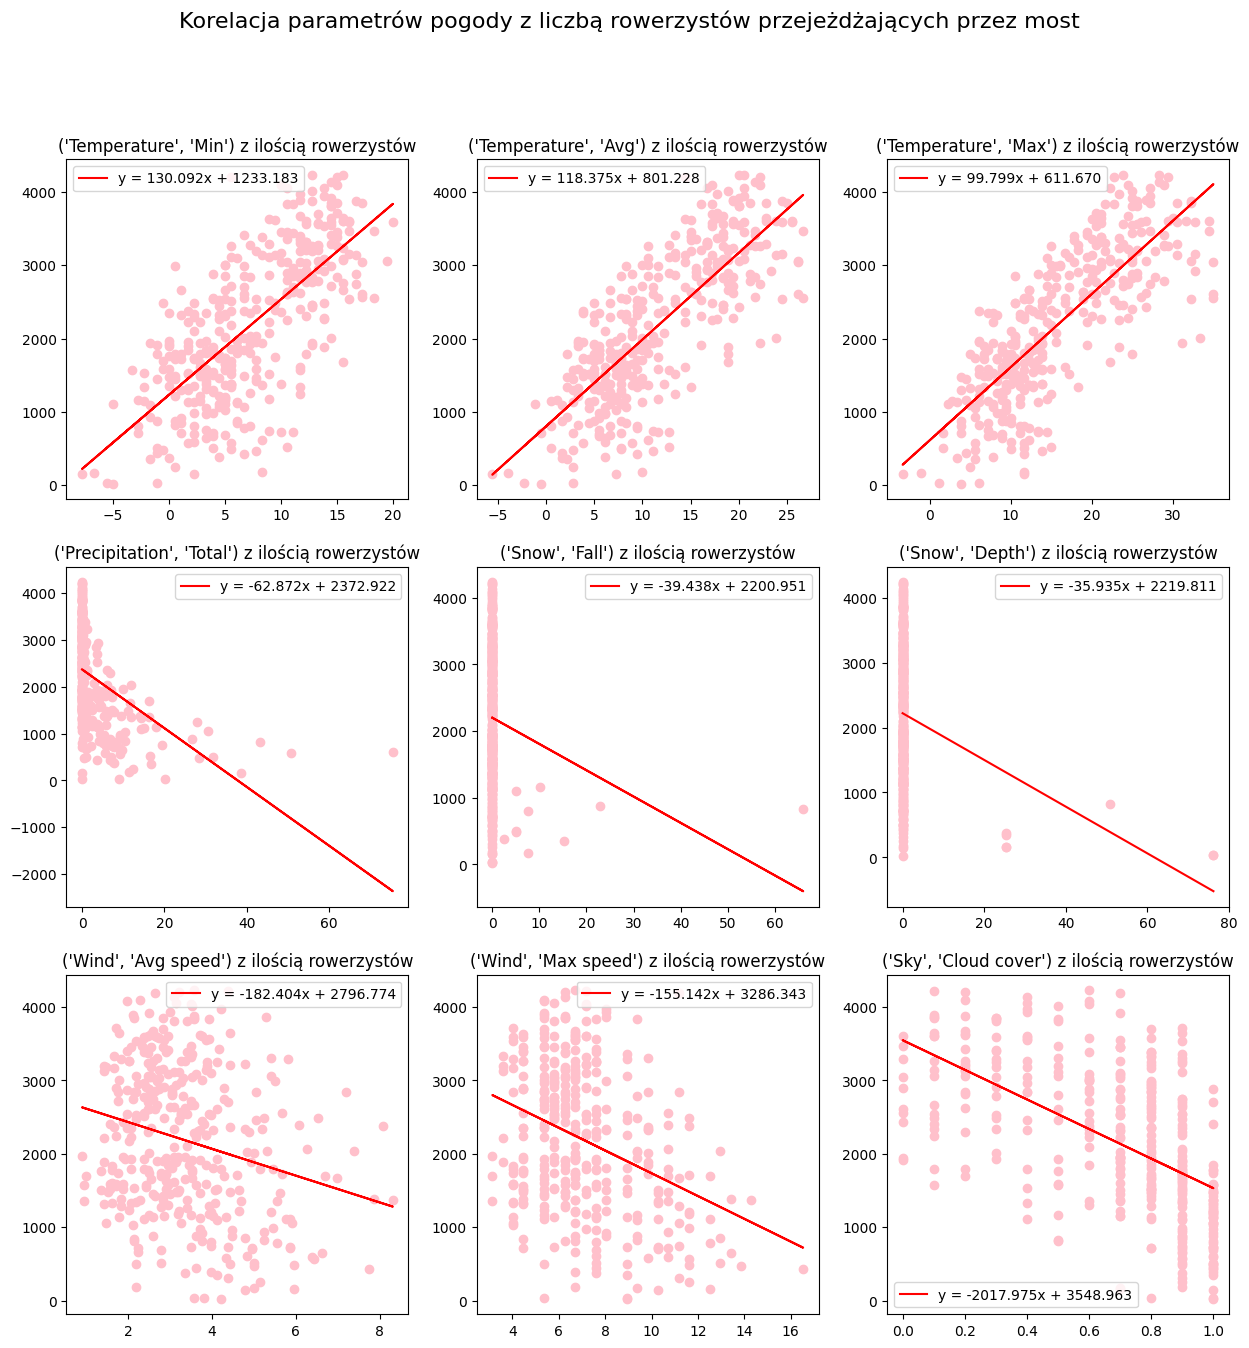

In [15]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for i, weather_param in enumerate(weather_data.columns):
    x = weather_data[weather_param]
    y = daily_bike_traffic_data["Total"]
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]

    slope = regression_data_1.loc[weather_param, ("Total", 'a')]
    intercept = regression_data_1.loc[weather_param, ("Total", 'b')]

    row_index = i // 3
    col_index = i % 3

    axs[row_index, col_index].scatter(x, y, color='pink')
    axs[row_index, col_index].plot(x, slope * x + intercept, color='red', label=f'y = {slope:.3f}x + {intercept:.3f}')
    axs[row_index, col_index].set_title(f'{weather_param} z ilością rowerzystów')

axs[0,0].legend(loc='upper left')
axs[0,1].legend(loc='upper left')
axs[0,2].legend(loc='upper left')
axs[1,0].legend(loc='upper right')
axs[1,1].legend(loc='upper right')
axs[1,2].legend(loc='upper right')
axs[2,0].legend(loc='upper right')
axs[2,1].legend(loc='upper right')
axs[2,2].legend(loc='lower left')

plt.suptitle('Korelacja parametrów pogody z liczbą rowerzystów przejeżdżających przez most', fontsize=16)

plt.show()


#### b) Regresja krzywoliniowa

Pobieżna analiza wykresów przygotowanych we wcześniejszym podpunkcie pokazuje, że w kilku przypadkach relacje między zmiennymi są bardziej skomplikowane i prosta regresja liniowa nie jest dobrym przybliżeniem obserwowanego trendu.

Korzystając z funkcji `scipy.optimize.curve_fit()` przygotuj tablicę `regression_data_2` zawierającą współczynniki równań regresji między zachmurzeniem, a liczbą rowerzystów przejeżdżających przez most danego dnia oraz między dziennymi opadami, a liczbą rowerzystów przejeżdżających przez most danego dnia. W obu przypadkach skorzystaj z następującego równania regresji:
$$ y = a e^{-bx} + c$$ 
gdzie: a, b, c - współczynniki równania dobierane metodą najmniejszych kwadratów.

W przypadku regresji między dziennymi opadami, a liczbą rowerzystów przejeżdżających przez most danego dnia ustaw parametry funkcji w taki sposób, aby wartość współczynnika c zawierała się w przedziale 90% - 110% wartości średniej liczby rowerzystów z 10 dni w roku z największą ilością opadów.

- Tablice powinna zawierać wyłącznie następujące elementy:</br>
    > Indeks: </br>
    > 1 rzędu: Sky, Precipitation</br>
    > 2 rzędu: Cloud cover, Total (sparowane pojedynczo z odpowiadającymi im indeksami 1 rzędu tak jak w nazwach kolumn tablicy `weather_data`)</br>    
    
    > Kolumny:</br>
    > 1 rzędu: Total, East, West</br>
    > 2 rzędu: a, b, c (ten sam zestaw kolumn dla każdego indeksu 1 rzędu)</br>
    
Wyświetl przygotowaną tablicę w taki sposób aby zawarte w tablicy liczby wyświetlały się z dokładnością 3 miejsc po przecinku.

Następnie przedstaw wyniki analizy w postaci wykresów korelacyjnych poszczególnych parametrów pogody z całkowitą liczbą rowerzystów przejeżdżających przes most danego dnia z nałożonymi na nie krzywymi regresji. Zestaw wykresy na pojedynczej figurze (siatka wykresów 1x2). Przygotuj figurę zgodnie z wytycznymi z nagłówka notatnika. Dodatkowo:
- ustaw różne od domyślnych i od siebie nawzajem kolory widocznych na wykresach punktów i linii,
- w tytule lub legendzie każdego z wykresów załącz równania regresji sformatowane tak, aby parametry równania były wyświetlone z dokładnością 3 miejsc po przecinku,
- w przypadku zastosowania legend należy je umiejscowić tak, aby znajdowały się w obrębie pól wykresów, ale nie zasłaniały znajdujących się na nich danych.

In [16]:
# Obliczenia i tablica
def func(x, a, b, c):
    return a*np.exp(-b*x)+c
x_data_1=weather_data['Precipitation']['Total']
x_data_2=weather_data['Sky']['Cloud cover']

regression_data_2 = pd.DataFrame(index=weather_data.columns[[3, 8]], columns=pd.MultiIndex.from_product([['Total', 'East', 'West'], ['a', 'b','c']]))

sorted_data = weather_data.sort_values(by=('Precipitation', 'Total'), ascending=False)
top_10_days = sorted_data.head(10)
top_10_dates = top_10_days.index
top_10_dates = top_10_dates.tolist()
selected_data = daily_bike_traffic_data.loc[top_10_dates]
average_daily_traffic = selected_data['Total'].mean()
min_av=0.9*average_daily_traffic
max_av=1.1*average_daily_traffic

for traffic_col_name in daily_bike_traffic_data.columns:
    popt_2, pcov_2 = sp.optimize.curve_fit(func, x_data_2, daily_bike_traffic_data[traffic_col_name])
    regression_data_2.loc[('Sky','Cloud cover'), (traffic_col_name, 'a')] = popt_2[0]
    regression_data_2.loc[('Sky','Cloud cover'), (traffic_col_name, 'b')] = popt_2[1]
    regression_data_2.loc[('Sky','Cloud cover'), (traffic_col_name, 'c')] = popt_2[2]
    
    #problemy z wartościami NaN
    mask = ~np.isnan(x_data_1) & ~np.isnan(daily_bike_traffic_data[traffic_col_name])
    x_data_1_filtered = x_data_1[mask]
    traffic_data_filtered = daily_bike_traffic_data[traffic_col_name][mask]
    popt_1, pcov_1 = sp.optimize.curve_fit(func, x_data_1_filtered, traffic_data_filtered, bounds=([-np.inf, -np.inf, min_av], [np.inf, np.inf, max_av]),max_nfev=10000)
    
    regression_data_2.loc[('Precipitation', 'Total'), (traffic_col_name, 'a')] = popt_1[0]
    regression_data_2.loc[('Precipitation', 'Total'), (traffic_col_name, 'b')] = popt_1[1]
    regression_data_2.loc[('Precipitation', 'Total'), (traffic_col_name, 'c')] = popt_1[2]

display(regression_data_2.style.format(precision=3))

In [17]:
### Komórka testowa

# Testy wybranych wartości z tablicy regression_data_2
assert np.isclose(regression_data_2.loc[("Precipitation", "Total"), ('Total', 'a')], 1897.3445607675376)
assert np.isclose(regression_data_2.loc[(("Sky", "Cloud cover")), ('East', 'b')], -3.5974646434134456)
assert np.isclose(regression_data_2.loc[("Precipitation", "Total"), ('Total', 'c')], 697.29)

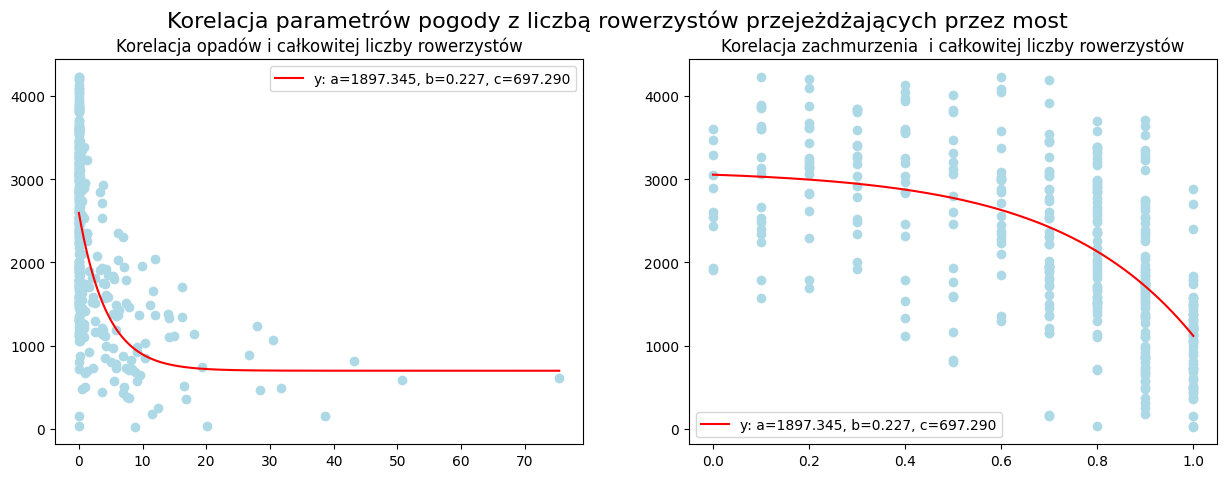

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

x = weather_data[("Precipitation", "Total")]
y = daily_bike_traffic_data["Total"]
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]
a_1=regression_data_2.loc[("Precipitation", "Total"), ("Total", 'a')]
b_1=regression_data_2.loc[("Precipitation", "Total"), ("Total", 'b')]
c_1=regression_data_2.loc[("Precipitation", "Total"), ("Total", 'c')]

axs[0].scatter(x,y,color='lightblue')
x = np.linspace(min(x), max(x), 1000)
axs[0].plot(x,func(x,a_1,b_1,c_1),color='red',label=f'y: a={a_1:.3f}, b={b_1:.3f}, c={c_1:.3f}')
axs[0].set_title("Korelacja opadów i całkowitej liczby rowerzystów")
axs[0].legend(loc='upper right')

x = weather_data[("Sky", "Cloud cover")]
y = daily_bike_traffic_data["Total"]
mask = ~np.isnan(x) & ~np.isnan(y)
x = x[mask]
y = y[mask]
a_2=regression_data_2.loc[("Sky", "Cloud cover"), ("Total", 'a')]
b_2=regression_data_2.loc[("Sky", "Cloud cover"), ("Total", 'b')]
c_2=regression_data_2.loc[("Sky", "Cloud cover"), ("Total", 'c')]

axs[1].scatter(x,y,color='lightblue')
x = np.linspace(min(x), max(x), 1000)
axs[1].plot(x,func(x,a_2,b_2,c_2),color='red',label=f'y: a={a_1:.3f}, b={b_1:.3f}, c={c_1:.3f}')
axs[1].set_title("Korelacja zachmurzenia  i całkowitej liczby rowerzystów")
axs[1].legend(loc='lower left')

plt.suptitle('Korelacja parametrów pogody z liczbą rowerzystów przejeżdżających przez most', fontsize=16)

plt.show()